In [1]:
from Vissim_env_class import environment
from Actor_critic_class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# Network Specific Libraries
from Balance_Functions import balance_dictionary

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Balance

In [ ]:
model_name  = 'Balance'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "E:\Backup - Onedrive\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim"
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


In [ ]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

In [ ]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [ ]:
env.reset()

# Balance DQN Debug

Current simulation: Balance_int3_all_actions_500_10800_DDQNdebug


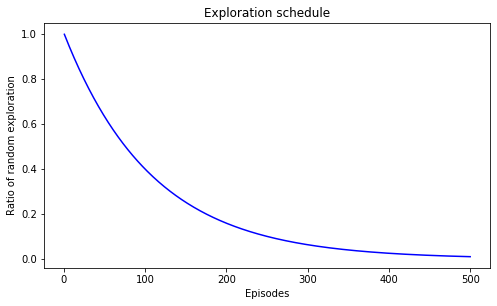

In [9]:
###############################
## Initialization Parameters ##
###############################

intersection = 3
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 10801
timesteps_per_second = 1
agent_type = "DDQN"
#actions_set = 'default_actions'     # 'default_actions' or 'all_actions'
actions_set = 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 128
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions_set + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type + "debug"
print("Current simulation: {}".format(Session_ID))

# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
## Deploy Agents
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()

INTERSECTION 2: SETTING UP AGENT
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 48)                720       
_________________________________________________________________
dense_13 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_14 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 392       
Total params: 5,816
Trainable params: 5,816
Non-trainable params: 0
_________________________________________________________________
Deployed instance of Double Deep Q Learning Agent(s) at Intersection 2

Experience file no

In [ ]:
# Deploy Environment
env = None
env = environment(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                  Random_Seed = Random_Seed, timesteps_per_second = timesteps_per_second, mode = 'debug', delete_results = True, verbose=True)

In [ ]:
## Test to ensure correct deployment of agents

# Test 1: Check number of agents
print(env.SCUs.items())

# Test 2: Check Dictionary for each agent
agent = 0
print("state_type: " + env.SCUs[agent].state_type)
print("state_size: ")
print(env.SCUs[agent].state_size)
print("reward_type: ")
print(env.SCUs[agent].reward_type)
print("compatible_actions: ")
print(env.SCUs[agent].compatible_actions)
print("all_actions: ")
print(env.SCUs[agent].all_actions)
print("Lanes_names: " )
print(env.SCUs[agent].Lanes_names)
print("Links_names: ")
print(env.SCUs[agent].Links_names)
print("time_steps_per_second: " + str(env.SCUs[agent].time_steps_per_second))
print("queues_counter_ID: " )
print(env.SCUs[agent].queues_counter_ID)
print("queues_counters: ")
print(env.SCUs[agent].queues_counters)
print("signal_controller: ")
print(env.SCUs[agent].signal_controller)
print("Signal_Groups: " )
print(env.SCUs[agent].signal_groups)
print("Node: " + str(env.SCUs[agent].Node))

## CORRECT - No apparent issues from this test

In [ ]:
## Tests to ensure correct STATE READING
timesteps = 100
for i in range(timesteps):
    env.Vissim.Simulation.RunSingleStep()

## Test 3: Correct Reading of queues from QUEUE COUNTERS
print("queues_counter_ID: " )
print(env.SCUs[0].queues_counter_ID)
print([env.Vissim.Net.QueueCounters.ItemByKey(i).AttValue('QLen(Current, Last)') for i in env.SCUs[0].queues_counter_ID])
    
# Test 4: Correct Reading of Aggregated Queues by SCU
print(env.SCUs[0].calculate_queues())

## Test 5: Correct Reading of Global Queues by ENVIRONMENT
print(env.get_queues())

## CORRECT - No apparent issues from this test

In [ ]:
## Test 6: Correct Reading of Initial State, and Generation of according actions
start_state = env.get_state()
actions = {}
print("Dict([(Agent_ID, array(state))])")
print(start_state.items())
print("")
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("{Agent_ID : Chosen_Action}")
print(actions)

## CORRECT - No apparent issues from this test

In [ ]:
## Test 7: Correct Reading of General State from SCU and Generation of according actions
SARSDs = env.step_to_next_action(actions)
actions = dict()
for idx , sarsd in SARSDs.items():
    s,a,r,ns,d = sarsd
    
print("Agent_ID: " + str(SARSDs.keys()))
print("Agent_State:")
print(SARSDs[0][0][0])
print("Agent_Action: " + str(SARSDs[0][1]))
print("Agent_Reward: " + str(SARSDs[0][2]))
print("Agent_Next_State:")
print(SARSDs[0][3][0])
print("Done: " + str(SARSDs[0][4]))

## CORRECT - No apparent issues from this test

In [ ]:
## Test 8: Correct operation of signal groups
signal_group = 2
env.SCUs[0].signal_groups[signal_group].SetAttValue("SigState", "RED")
env.Vissim.Simulation.RunSingleStep()

## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-1: Correct implementation of actions (SETUP)
for idx, agent in Balance_int_MultiDQN_Agents.Agents.items():
    agent.reset()

start_state = env.get_state()
print("Initial State: {Agent_ID: initual queues}")
print(start_state)
actions = {}
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("Initial Choice of Actions: {Agent_ID: action}")    
print(actions)

# That is not a clean way to do this
def to_dictionary(dictionary,idx,value):
    """
    Assign a value to an index in a dictionary
    """
    dictionary[idx] = value
    
## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-2: Correct implementation of actions (EXECUTION)
##
## ATTENTION: If an "index out of range" is requested, the system will break an will\
##            require a reset. This does not affect normal simulation.

actions[0] = 2
# This is step_to_next_action() function
while not env.action_required:
    
    # This is the step() function
    Sarsd = dict()
    
    # The default position is that no action is required, only a step of simulator
    env.action_required = False
    #print("false 1")
    
    [scu.action_update(actions[0] , green_time = 5 ) for idx, scu in env.SCUs.items() if scu.action_required]
    
    [scu.update() for idx,scu in env.SCUs.items()]
    
    env.Vissim.Simulation.RunSingleStep()
    
    [to_dictionary(Sarsd,idx,scu.sars()+[env.done]) for idx,scu in env.SCUs.items() if scu.action_required ]
    
    if len(Sarsd) > 0 or env.done :
        env.action_required = True
        #print("TRUE")
print("State [W, S1, S2, S3, W, N1, N2]:")   
print(Sarsd[0][0][0])
print("Action:")
print(Sarsd[0][1])
print("Reward:")
print(Sarsd[0][2])
print("NextState [W, S1, S2, S3, W, N1, N2]:")
print(Sarsd[0][3][0])
env.action_required = False
#print("false 2")


In [ ]:
## Test 10: Correct changing of phases based on actions

In [ ]:
## Test 11: Correct calculation of rewards

# Balance RL DQN Partial Training

In [2]:
intersection = 13
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 42
sim_length = 10801
timesteps_per_second = 1
agent_type = "DuelingDDQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 10000
batch_size = 256
batches_per_episode = 10

alpha = 0.0001
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type + "_QueueIncentive"
print("Current simulation: {}".format(Session_ID))

Current simulation: Balance_int13_default_actions_500_10800_DuelingDDQN_QueueIncentive


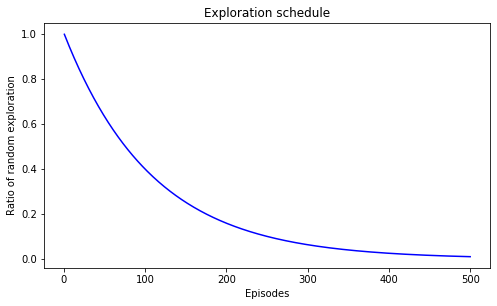

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [4]:
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

INTERSECTION 12: SETTING UP AGENT
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           192         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 24)           600         dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 24)           600         dense_1[0][0]                    
____________________________________________________________

In [5]:
Balance_int_MultiDQN_Agents.prepopulate_memory()

Previous Experience: Found. Loading into agents
Previous Experience: Successfully loaded file from:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int13\Agents_Results\DuelingDDQN\Balance_int13_default_actions_500_10800_DuelingDDQN_QueueIncentive\Agent0_PERPre_10000.p


In [6]:
Balance_int_MultiDQN_Agents.train(episodes - Balance_int_MultiDQN_Agents.number_of_episode)

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int13.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deployme

Train on 256 samples
256/256 - 0s - loss: 25354.9707
Train on 256 samples
256/256 - 0s - loss: 24219.5762
Weights succesfully copied to Target model for Agent 12.
Reducing exploration for all agents to 0.9118

Episode 11: Starting computation.
Random Seed Set to 53
Episode 11: Finished running.
Agent 0, Average Reward: -156.33
Train on 256 samples
256/256 - 0s - loss: 24024.5098
Train on 256 samples
256/256 - 0s - loss: 24641.6875
Train on 256 samples
256/256 - 0s - loss: 24065.7969
Train on 256 samples
256/256 - 0s - loss: 24385.0078
Train on 256 samples
256/256 - 0s - loss: 25131.4297
Train on 256 samples
256/256 - 0s - loss: 24502.1992
Train on 256 samples
256/256 - 0s - loss: 23273.1426
Train on 256 samples
256/256 - 0s - loss: 25113.0332
Train on 256 samples
256/256 - 0s - loss: 23805.9004
Train on 256 samples
256/256 - 0s - loss: 24492.2891
Reducing exploration for all agents to 0.9035

Episode 12: Starting computation.
Random Seed Set to 54
Episode 12: Finished running.
Agent 0,

Random Seed Set to 64
Episode 22: Finished running.
Agent 0, Average Reward: 6.63
Saving architecture, weights, optimizer state for best agent-12
Train on 256 samples
256/256 - 0s - loss: 22687.0508
Train on 256 samples
256/256 - 0s - loss: 23701.9004
Train on 256 samples
256/256 - 0s - loss: 23176.8047
Train on 256 samples
256/256 - 0s - loss: 23617.0430
Train on 256 samples
256/256 - 0s - loss: 24228.7812
Train on 256 samples
256/256 - 0s - loss: 24956.2090
Train on 256 samples
256/256 - 0s - loss: 23361.9121
Train on 256 samples
256/256 - 0s - loss: 22314.2598
Train on 256 samples
256/256 - 0s - loss: 22892.2793
Train on 256 samples
256/256 - 0s - loss: 23348.2480
Reducing exploration for all agents to 0.8163

Episode 23: Starting computation.
Random Seed Set to 65
Episode 23: Finished running.
Agent 0, Average Reward: 24.99
Saving architecture, weights, optimizer state for best agent-12
Train on 256 samples
256/256 - 0s - loss: 22773.7637
Train on 256 samples
256/256 - 0s - loss: 2

Train on 256 samples
256/256 - 0s - loss: 18310.1562
Train on 256 samples
256/256 - 0s - loss: 18973.8809
Train on 256 samples
256/256 - 0s - loss: 18060.0742
Train on 256 samples
256/256 - 0s - loss: 18165.2285
Reducing exploration for all agents to 0.7375

Episode 34: Starting computation.
Random Seed Set to 76
Episode 34: Finished running.
Agent 0, Average Reward: -29.37
Train on 256 samples
256/256 - 0s - loss: 20531.2480
Train on 256 samples
256/256 - 0s - loss: 19359.4082
Train on 256 samples
256/256 - 0s - loss: 19086.2324
Train on 256 samples
256/256 - 0s - loss: 18269.3340
Train on 256 samples
256/256 - 0s - loss: 18705.1738
Train on 256 samples
256/256 - 0s - loss: 19589.8926
Train on 256 samples
256/256 - 0s - loss: 18579.3574
Train on 256 samples
256/256 - 0s - loss: 18224.0410
Train on 256 samples
256/256 - 0s - loss: 19554.3809
Train on 256 samples
256/256 - 0s - loss: 19958.1309
Reducing exploration for all agents to 0.7307

Episode 35: Starting computation.
Random Seed 

Episode 45: Finished running.
Agent 0, Average Reward: -122.54
Train on 256 samples
256/256 - 0s - loss: 16209.5547
Train on 256 samples
256/256 - 0s - loss: 16898.4355
Train on 256 samples
256/256 - 0s - loss: 15936.1729
Train on 256 samples
256/256 - 0s - loss: 17654.9863
Train on 256 samples
256/256 - 0s - loss: 16714.8535
Train on 256 samples
256/256 - 0s - loss: 16567.1191
Train on 256 samples
256/256 - 0s - loss: 17250.8223
Train on 256 samples
256/256 - 0s - loss: 17246.2578
Train on 256 samples
256/256 - 0s - loss: 16422.8418
Train on 256 samples
256/256 - 0s - loss: 16045.7822
Reducing exploration for all agents to 0.6601

Episode 46: Starting computation.
Random Seed Set to 88
Episode 46: Finished running.
Agent 0, Average Reward: -146.86
Train on 256 samples
256/256 - 0s - loss: 15906.2090
Train on 256 samples
256/256 - 0s - loss: 16040.6250
Train on 256 samples
256/256 - 0s - loss: 15907.6094
Train on 256 samples
256/256 - 0s - loss: 15817.4961
Train on 256 samples
256/256 

Train on 256 samples
256/256 - 0s - loss: 16541.1934
Train on 256 samples
256/256 - 0s - loss: 17004.2812
Reducing exploration for all agents to 0.5964

Episode 57: Starting computation.
Random Seed Set to 99
Episode 57: Finished running.
Agent 0, Average Reward: -314.15
Train on 256 samples
256/256 - 0s - loss: 19629.5723
Train on 256 samples
256/256 - 0s - loss: 19302.2988
Train on 256 samples
256/256 - 0s - loss: 16405.5723
Train on 256 samples
256/256 - 0s - loss: 17895.4980
Train on 256 samples
256/256 - 0s - loss: 17390.0762
Train on 256 samples
256/256 - 0s - loss: 17335.5156
Train on 256 samples
256/256 - 0s - loss: 17965.8418
Train on 256 samples
256/256 - 0s - loss: 17890.0312
Train on 256 samples
256/256 - 0s - loss: 17164.2324
Train on 256 samples
256/256 - 0s - loss: 16799.0879
Reducing exploration for all agents to 0.5909

Episode 58: Starting computation.
Random Seed Set to 100
Episode 58: Finished running.
Agent 0, Average Reward: -410.05
Train on 256 samples
256/256 - 

Train on 256 samples
256/256 - 0s - loss: 9118.1523
Train on 256 samples
256/256 - 0s - loss: 8443.0645
Train on 256 samples
256/256 - 0s - loss: 7945.1621
Train on 256 samples
256/256 - 0s - loss: 7912.2178
Train on 256 samples
256/256 - 0s - loss: 8140.1826
Train on 256 samples
256/256 - 0s - loss: 7634.4468
Train on 256 samples
256/256 - 0s - loss: 8203.4082
Train on 256 samples
256/256 - 0s - loss: 7499.5918
Train on 256 samples
256/256 - 0s - loss: 7709.3140
Reducing exploration for all agents to 0.5339

Episode 69: Starting computation.
Random Seed Set to 111
Episode 69: Finished running.
Agent 0, Average Reward: -224.84
Train on 256 samples
256/256 - 0s - loss: 7137.8345
Train on 256 samples
256/256 - 0s - loss: 7741.8716
Train on 256 samples
256/256 - 0s - loss: 7153.3682
Train on 256 samples
256/256 - 0s - loss: 7316.5220
Train on 256 samples
256/256 - 0s - loss: 7456.5708
Train on 256 samples
256/256 - 0s - loss: 7229.6948
Train on 256 samples
256/256 - 0s - loss: 7541.7168
T

Episode 80: Finished running.
Agent 0, Average Reward: -35.37
Train on 256 samples
256/256 - 0s - loss: 7685.2153
Train on 256 samples
256/256 - 0s - loss: 8135.0254
Train on 256 samples
256/256 - 0s - loss: 8335.2637
Train on 256 samples
256/256 - 0s - loss: 7969.6572
Train on 256 samples
256/256 - 0s - loss: 7612.1709
Train on 256 samples
256/256 - 0s - loss: 7845.3618
Train on 256 samples
256/256 - 0s - loss: 8090.7007
Train on 256 samples
256/256 - 0s - loss: 8154.1401
Train on 256 samples
256/256 - 0s - loss: 8068.0317
Train on 256 samples
256/256 - 0s - loss: 7703.2349
Weights succesfully copied to Target model for Agent 12.
Saving architecture, weights and optimizer state for agent-12
Dumping agent-12 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.4779

Episode 81: Starting computation.
Random Seed Set to 123
Episode 81: Finished running.
Agent 0, Average Reward: -31.4
Train on 25

Train on 256 samples
256/256 - 0s - loss: 11928.9307
Train on 256 samples
256/256 - 0s - loss: 12021.1396
Train on 256 samples
256/256 - 0s - loss: 12553.8975
Train on 256 samples
256/256 - 0s - loss: 10806.6621
Train on 256 samples
256/256 - 0s - loss: 11803.8984
Reducing exploration for all agents to 0.4318

Episode 92: Starting computation.
Random Seed Set to 134
Episode 92: Finished running.
Agent 0, Average Reward: -65.34
Train on 256 samples
256/256 - 0s - loss: 12328.6328
Train on 256 samples
256/256 - 0s - loss: 12312.7158
Train on 256 samples
256/256 - 0s - loss: 11848.2373
Train on 256 samples
256/256 - 0s - loss: 12639.4492
Train on 256 samples
256/256 - 0s - loss: 12040.7744
Train on 256 samples
256/256 - 0s - loss: 12563.4775
Train on 256 samples
256/256 - 0s - loss: 12898.7744
Train on 256 samples
256/256 - 0s - loss: 12551.2041
Train on 256 samples
256/256 - 0s - loss: 12360.9814
Train on 256 samples
256/256 - 0s - loss: 13371.6367
Reducing exploration for all agents to 

Random Seed Set to 145
Episode 103: Finished running.
Agent 0, Average Reward: -192.93
Train on 256 samples
256/256 - 0s - loss: 7439.5327
Train on 256 samples
256/256 - 0s - loss: 7475.4741
Train on 256 samples
256/256 - 0s - loss: 6219.0249
Train on 256 samples
256/256 - 0s - loss: 7366.3135
Train on 256 samples
256/256 - 0s - loss: 5822.6431
Train on 256 samples
256/256 - 0s - loss: 6888.7993
Train on 256 samples
256/256 - 0s - loss: 6649.6807
Train on 256 samples
256/256 - 0s - loss: 6540.8291
Train on 256 samples
256/256 - 0s - loss: 5759.6484
Train on 256 samples
256/256 - 0s - loss: 6908.3589
Reducing exploration for all agents to 0.3865

Episode 104: Starting computation.
Random Seed Set to 146
Episode 104: Finished running.
Agent 0, Average Reward: -16.6
Train on 256 samples
256/256 - 0s - loss: 5586.8540
Train on 256 samples
256/256 - 0s - loss: 6812.9341
Train on 256 samples
256/256 - 0s - loss: 6837.4478
Train on 256 samples
256/256 - 0s - loss: 6096.4956
Train on 256 sampl

Train on 256 samples
256/256 - 0s - loss: 8104.9414
Train on 256 samples
256/256 - 0s - loss: 6368.6719
Reducing exploration for all agents to 0.3492

Episode 115: Starting computation.
Random Seed Set to 157
Episode 115: Finished running.
Agent 0, Average Reward: -31.22
Train on 256 samples
256/256 - 0s - loss: 7495.0894
Train on 256 samples
256/256 - 0s - loss: 9087.8242
Train on 256 samples
256/256 - 0s - loss: 8577.9893
Train on 256 samples
256/256 - 0s - loss: 7546.7764
Train on 256 samples
256/256 - 0s - loss: 9553.3984
Train on 256 samples
256/256 - 0s - loss: 6923.6152
Train on 256 samples
256/256 - 0s - loss: 8032.1128
Train on 256 samples
256/256 - 0s - loss: 10585.0674
Train on 256 samples
256/256 - 0s - loss: 7781.3774
Train on 256 samples
256/256 - 0s - loss: 8997.2168
Reducing exploration for all agents to 0.346

Episode 116: Starting computation.
Random Seed Set to 158
Episode 116: Finished running.
Agent 0, Average Reward: -253.33
Train on 256 samples
256/256 - 0s - los

Train on 256 samples
256/256 - 0s - loss: 7566.2827
Train on 256 samples
256/256 - 0s - loss: 6593.5908
Train on 256 samples
256/256 - 0s - loss: 6572.4019
Train on 256 samples
256/256 - 0s - loss: 6341.6572
Train on 256 samples
256/256 - 0s - loss: 6831.5420
Train on 256 samples
256/256 - 0s - loss: 6393.6323
Train on 256 samples
256/256 - 0s - loss: 7794.3574
Train on 256 samples
256/256 - 0s - loss: 6410.0835
Reducing exploration for all agents to 0.3126

Episode 127: Starting computation.
Random Seed Set to 169
Episode 127: Finished running.
Agent 0, Average Reward: -409.7
Train on 256 samples
256/256 - 0s - loss: 7261.5830
Train on 256 samples
256/256 - 0s - loss: 6677.6069
Train on 256 samples
256/256 - 0s - loss: 5981.4600
Train on 256 samples
256/256 - 0s - loss: 6072.1167
Train on 256 samples
256/256 - 0s - loss: 8046.1543
Train on 256 samples
256/256 - 0s - loss: 7280.1318
Train on 256 samples
256/256 - 0s - loss: 7236.4868
Train on 256 samples
256/256 - 0s - loss: 7522.2441


Random Seed Set to 180
Episode 138: Finished running.
Agent 0, Average Reward: -640.06
Train on 256 samples
256/256 - 0s - loss: 7857.9126
Train on 256 samples
256/256 - 0s - loss: 10749.1689
Train on 256 samples
256/256 - 0s - loss: 7564.8687
Train on 256 samples
256/256 - 0s - loss: 6886.3604
Train on 256 samples
256/256 - 0s - loss: 5431.4082
Train on 256 samples
256/256 - 0s - loss: 7033.3804
Train on 256 samples
256/256 - 0s - loss: 6836.4170
Train on 256 samples
256/256 - 0s - loss: 6381.5288
Train on 256 samples
256/256 - 0s - loss: 7489.6479
Train on 256 samples
256/256 - 0s - loss: 6659.2739
Reducing exploration for all agents to 0.2798

Episode 139: Starting computation.
Random Seed Set to 181
Episode 139: Finished running.
Agent 0, Average Reward: -586.51
Train on 256 samples
256/256 - 0s - loss: 5527.3262
Train on 256 samples
256/256 - 0s - loss: 5362.3403
Train on 256 samples
256/256 - 0s - loss: 8051.0024
Train on 256 samples
256/256 - 0s - loss: 8098.9058
Train on 256 sa

256/256 - 0s - loss: 8741.5420
Train on 256 samples
256/256 - 0s - loss: 10009.5898
Train on 256 samples
256/256 - 0s - loss: 7408.6548
Train on 256 samples
256/256 - 0s - loss: 7724.5923
Train on 256 samples
256/256 - 0s - loss: 9287.2852
Reducing exploration for all agents to 0.2528

Episode 150: Starting computation.
Random Seed Set to 192
Episode 150: Finished running.
Agent 0, Average Reward: -298.59
Train on 256 samples
256/256 - 0s - loss: 7081.2959
Train on 256 samples
256/256 - 0s - loss: 7850.8091
Train on 256 samples
256/256 - 0s - loss: 7593.9712
Train on 256 samples
256/256 - 0s - loss: 8710.7812
Train on 256 samples
256/256 - 0s - loss: 8255.5684
Train on 256 samples
256/256 - 0s - loss: 8390.8701
Train on 256 samples
256/256 - 0s - loss: 8058.6675
Train on 256 samples
256/256 - 0s - loss: 8588.1738
Train on 256 samples
256/256 - 0s - loss: 7773.5591
Train on 256 samples
256/256 - 0s - loss: 7450.0142
Weights succesfully copied to Target model for Agent 12.
Reducing explo

Random Seed Set to 203
Episode 161: Finished running.
Agent 0, Average Reward: -407.32
Train on 256 samples
256/256 - 0s - loss: 28046.8965
Train on 256 samples
256/256 - 0s - loss: 30369.8516
Train on 256 samples
256/256 - 0s - loss: 24287.0996
Train on 256 samples
256/256 - 0s - loss: 28018.1055
Train on 256 samples
256/256 - 0s - loss: 23005.3867
Train on 256 samples
256/256 - 0s - loss: 21229.1074
Train on 256 samples
256/256 - 0s - loss: 19026.9727
Train on 256 samples
256/256 - 0s - loss: 17737.2480
Train on 256 samples
256/256 - 0s - loss: 18978.7773
Train on 256 samples
256/256 - 0s - loss: 13292.0020
Reducing exploration for all agents to 0.2263

Episode 162: Starting computation.
Random Seed Set to 204
Episode 162: Finished running.
Agent 0, Average Reward: -444.18
Train on 256 samples
256/256 - 0s - loss: 13508.5518
Train on 256 samples
256/256 - 0s - loss: 14785.6719
Train on 256 samples
256/256 - 0s - loss: 12944.7500
Train on 256 samples
256/256 - 0s - loss: 10722.7559
Tr

Train on 256 samples
256/256 - 0s - loss: 12461.6748
Train on 256 samples
256/256 - 0s - loss: 8662.8359
Reducing exploration for all agents to 0.2045

Episode 173: Starting computation.
Random Seed Set to 215
Episode 173: Finished running.
Agent 0, Average Reward: -71.89
Train on 256 samples
256/256 - 0s - loss: 12258.0830
Train on 256 samples
256/256 - 0s - loss: 11348.3506
Train on 256 samples
256/256 - 0s - loss: 11364.7314
Train on 256 samples
256/256 - 0s - loss: 11934.0400
Train on 256 samples
256/256 - 0s - loss: 9565.7295
Train on 256 samples
256/256 - 0s - loss: 12525.5938
Train on 256 samples
256/256 - 0s - loss: 8275.9453
Train on 256 samples
256/256 - 0s - loss: 7818.1240
Train on 256 samples
256/256 - 0s - loss: 6368.5098
Train on 256 samples
256/256 - 0s - loss: 7414.5410
Reducing exploration for all agents to 0.2026

Episode 174: Starting computation.
Random Seed Set to 216
Episode 174: Finished running.
Agent 0, Average Reward: -171.14
Train on 256 samples
256/256 - 0s

Train on 256 samples
256/256 - 0s - loss: 10611.0869
Train on 256 samples
256/256 - 0s - loss: 9509.2646
Train on 256 samples
256/256 - 0s - loss: 9371.0791
Train on 256 samples
256/256 - 0s - loss: 12180.9346
Train on 256 samples
256/256 - 0s - loss: 13789.4678
Train on 256 samples
256/256 - 0s - loss: 8160.0923
Train on 256 samples
256/256 - 0s - loss: 9015.2354
Train on 256 samples
256/256 - 0s - loss: 7651.4595
Train on 256 samples
256/256 - 0s - loss: 15993.9131
Reducing exploration for all agents to 0.183

Episode 185: Starting computation.
Random Seed Set to 227
Episode 185: Finished running.
Agent 0, Average Reward: -536.03
Train on 256 samples
256/256 - 0s - loss: 10702.8545
Train on 256 samples
256/256 - 0s - loss: 12546.8945
Train on 256 samples
256/256 - 0s - loss: 9354.7217
Train on 256 samples
256/256 - 0s - loss: 12743.6387
Train on 256 samples
256/256 - 0s - loss: 9823.0117
Train on 256 samples
256/256 - 0s - loss: 18384.1777
Train on 256 samples
256/256 - 0s - loss: 23

Random Seed Set to 238
Episode 196: Finished running.
Agent 0, Average Reward: -450.62
Train on 256 samples
256/256 - 0s - loss: 13530.3008
Train on 256 samples
256/256 - 0s - loss: 12264.6904
Train on 256 samples
256/256 - 0s - loss: 9332.4229
Train on 256 samples
256/256 - 0s - loss: 7390.5874
Train on 256 samples
256/256 - 0s - loss: 10561.0449
Train on 256 samples
256/256 - 0s - loss: 8470.2607
Train on 256 samples
256/256 - 0s - loss: 14874.3281
Train on 256 samples
256/256 - 0s - loss: 8571.3770
Train on 256 samples
256/256 - 0s - loss: 11359.3359
Train on 256 samples
256/256 - 0s - loss: 14221.8633
Reducing exploration for all agents to 0.1638

Episode 197: Starting computation.
Random Seed Set to 239
Episode 197: Finished running.
Agent 0, Average Reward: -246.91
Train on 256 samples
256/256 - 0s - loss: 14678.3457
Train on 256 samples
256/256 - 0s - loss: 15084.6074
Train on 256 samples
256/256 - 0s - loss: 16672.7246
Train on 256 samples
256/256 - 0s - loss: 17375.1836
Train 

Train on 256 samples
256/256 - 0s - loss: 5606.1943
Train on 256 samples
256/256 - 0s - loss: 8865.1426
Train on 256 samples
256/256 - 0s - loss: 12280.4502
Train on 256 samples
256/256 - 0s - loss: 9696.3457
Train on 256 samples
256/256 - 0s - loss: 10436.6895
Train on 256 samples
256/256 - 0s - loss: 6457.1528
Reducing exploration for all agents to 0.148

Episode 208: Starting computation.
Random Seed Set to 250
Episode 208: Finished running.
Agent 0, Average Reward: -525.18
Train on 256 samples
256/256 - 0s - loss: 10265.9707
Train on 256 samples
256/256 - 0s - loss: 9110.0039
Train on 256 samples
256/256 - 0s - loss: 7721.6284
Train on 256 samples
256/256 - 0s - loss: 5964.8154
Train on 256 samples
256/256 - 0s - loss: 15939.4102
Train on 256 samples
256/256 - 0s - loss: 7398.5156
Train on 256 samples
256/256 - 0s - loss: 13123.0723
Train on 256 samples
256/256 - 0s - loss: 9761.2676
Train on 256 samples
256/256 - 0s - loss: 6872.0405
Train on 256 samples
256/256 - 0s - loss: 7613.

Train on 256 samples
256/256 - 0s - loss: 10942.8867
Train on 256 samples
256/256 - 0s - loss: 12035.3262
Train on 256 samples
256/256 - 0s - loss: 7712.8594
Train on 256 samples
256/256 - 0s - loss: 8023.1646
Train on 256 samples
256/256 - 0s - loss: 8157.0889
Train on 256 samples
256/256 - 0s - loss: 8127.2393
Train on 256 samples
256/256 - 0s - loss: 24171.9160
Train on 256 samples
256/256 - 0s - loss: 14645.9766
Train on 256 samples
256/256 - 0s - loss: 8559.5928
Reducing exploration for all agents to 0.1325

Episode 220: Starting computation.
Random Seed Set to 262
Episode 220: Finished running.
Agent 0, Average Reward: -695.0
Train on 256 samples
256/256 - 0s - loss: 9260.2861
Train on 256 samples
256/256 - 0s - loss: 10460.6094
Train on 256 samples
256/256 - 0s - loss: 8077.4941
Train on 256 samples
256/256 - 0s - loss: 8033.3115
Train on 256 samples
256/256 - 0s - loss: 8394.3340
Train on 256 samples
256/256 - 0s - loss: 5038.2012
Train on 256 samples
256/256 - 0s - loss: 7458.

Train on 256 samples
256/256 - 0s - loss: 8936.6494
Train on 256 samples
256/256 - 0s - loss: 11592.7852
Weights succesfully copied to Target model for Agent 12.
Reducing exploration for all agents to 0.1197

Episode 231: Starting computation.
Random Seed Set to 273
Episode 231: Finished running.
Agent 0, Average Reward: -504.79
Train on 256 samples
256/256 - 0s - loss: 22720.2324
Train on 256 samples
256/256 - 0s - loss: 23864.2461
Train on 256 samples
256/256 - 0s - loss: 18611.3281
Train on 256 samples
256/256 - 0s - loss: 15638.1621
Train on 256 samples
256/256 - 0s - loss: 18127.9180
Train on 256 samples
256/256 - 0s - loss: 11550.4072
Train on 256 samples
256/256 - 0s - loss: 10406.3594
Train on 256 samples
256/256 - 0s - loss: 11329.5508
Train on 256 samples
256/256 - 0s - loss: 12039.4336
Train on 256 samples
256/256 - 0s - loss: 9645.7676
Reducing exploration for all agents to 0.1186

Episode 232: Starting computation.
Random Seed Set to 274
Episode 232: Finished running.
Agen

Train on 256 samples
256/256 - 0s - loss: 20593.4395
Train on 256 samples
256/256 - 0s - loss: 10965.9541
Train on 256 samples
256/256 - 0s - loss: 13577.7178
Train on 256 samples
256/256 - 0s - loss: 21792.2617
Train on 256 samples
256/256 - 0s - loss: 32446.2910
Train on 256 samples
256/256 - 0s - loss: 35312.3047
Train on 256 samples
256/256 - 0s - loss: 10851.1250
Train on 256 samples
256/256 - 0s - loss: 21381.5078
Train on 256 samples
256/256 - 0s - loss: 40995.1680
Reducing exploration for all agents to 0.1072

Episode 243: Starting computation.
Random Seed Set to 285
Episode 243: Finished running.
Agent 0, Average Reward: -349.54
Train on 256 samples
256/256 - 0s - loss: 40954.2227
Train on 256 samples
256/256 - 0s - loss: 15658.6055
Train on 256 samples
256/256 - 0s - loss: 26151.4629
Train on 256 samples
256/256 - 0s - loss: 12890.9824
Train on 256 samples
256/256 - 0s - loss: 19210.8906
Train on 256 samples
256/256 - 0s - loss: 11747.7334
Train on 256 samples
256/256 - 0s - 

Random Seed Set to 296
Episode 254: Finished running.
Agent 0, Average Reward: -414.47
Train on 256 samples
256/256 - 0s - loss: 21250.3438
Train on 256 samples
256/256 - 0s - loss: 14060.1230
Train on 256 samples
256/256 - 0s - loss: 16177.3740
Train on 256 samples
256/256 - 0s - loss: 18333.7480
Train on 256 samples
256/256 - 0s - loss: 14681.9932
Train on 256 samples
256/256 - 0s - loss: 13536.7295
Train on 256 samples
256/256 - 0s - loss: 9401.5264
Train on 256 samples
256/256 - 0s - loss: 10243.6611
Train on 256 samples
256/256 - 0s - loss: 12869.8555
Train on 256 samples
256/256 - 0s - loss: 12535.2012
Reducing exploration for all agents to 0.0959

Episode 255: Starting computation.
Random Seed Set to 297
Episode 255: Finished running.
Agent 0, Average Reward: -457.39
Train on 256 samples
256/256 - 0s - loss: 23572.4199
Train on 256 samples
256/256 - 0s - loss: 15481.8613
Train on 256 samples
256/256 - 0s - loss: 23105.3457
Train on 256 samples
256/256 - 0s - loss: 19952.2578
Tra

Train on 256 samples
256/256 - 0s - loss: 12461.1963
Train on 256 samples
256/256 - 0s - loss: 8837.8359
Train on 256 samples
256/256 - 0s - loss: 8783.9180
Train on 256 samples
256/256 - 0s - loss: 16196.1162
Train on 256 samples
256/256 - 0s - loss: 8314.4648
Train on 256 samples
256/256 - 0s - loss: 9716.9941
Reducing exploration for all agents to 0.0867

Episode 266: Starting computation.
Random Seed Set to 308
Episode 266: Finished running.
Agent 0, Average Reward: -527.36
Train on 256 samples
256/256 - 0s - loss: 6771.0288
Train on 256 samples
256/256 - 0s - loss: 7347.2378
Train on 256 samples
256/256 - 0s - loss: 5471.3979
Train on 256 samples
256/256 - 0s - loss: 7009.1470
Train on 256 samples
256/256 - 0s - loss: 14019.1172
Train on 256 samples
256/256 - 0s - loss: 5088.5322
Train on 256 samples
256/256 - 0s - loss: 7309.1309
Train on 256 samples
256/256 - 0s - loss: 6426.7627
Train on 256 samples
256/256 - 0s - loss: 5948.4585
Train on 256 samples
256/256 - 0s - loss: 7539.7

Train on 256 samples
256/256 - 0s - loss: 15264.6172
Train on 256 samples
256/256 - 0s - loss: 13309.1514
Train on 256 samples
256/256 - 0s - loss: 20345.5625
Train on 256 samples
256/256 - 0s - loss: 12736.0771
Train on 256 samples
256/256 - 0s - loss: 8528.2061
Train on 256 samples
256/256 - 0s - loss: 11160.3223
Train on 256 samples
256/256 - 0s - loss: 16017.3447
Train on 256 samples
256/256 - 0s - loss: 22100.2656
Train on 256 samples
256/256 - 0s - loss: 9665.7363
Reducing exploration for all agents to 0.0776

Episode 278: Starting computation.
Random Seed Set to 320
Episode 278: Finished running.
Agent 0, Average Reward: -486.68
Train on 256 samples
256/256 - 0s - loss: 10195.8438
Train on 256 samples
256/256 - 0s - loss: 7659.9180
Train on 256 samples
256/256 - 0s - loss: 12273.4736
Train on 256 samples
256/256 - 0s - loss: 17620.5234
Train on 256 samples
256/256 - 0s - loss: 16370.6572
Train on 256 samples
256/256 - 0s - loss: 13431.1230
Train on 256 samples
256/256 - 0s - los

Train on 256 samples
256/256 - 0s - loss: 16934.6836
Train on 256 samples
256/256 - 0s - loss: 9222.3057
Train on 256 samples
256/256 - 0s - loss: 13541.3398
Reducing exploration for all agents to 0.0701

Episode 289: Starting computation.
Random Seed Set to 331
Episode 289: Finished running.
Agent 0, Average Reward: -581.57
Train on 256 samples
256/256 - 0s - loss: 10753.2656
Train on 256 samples
256/256 - 0s - loss: 6016.2290
Train on 256 samples
256/256 - 0s - loss: 8684.0645
Train on 256 samples
256/256 - 0s - loss: 8823.4307
Train on 256 samples
256/256 - 0s - loss: 10200.5488
Train on 256 samples
256/256 - 0s - loss: 8229.3389
Train on 256 samples
256/256 - 0s - loss: 7501.0972
Train on 256 samples
256/256 - 0s - loss: 9309.2236
Train on 256 samples
256/256 - 0s - loss: 11641.0312
Train on 256 samples
256/256 - 0s - loss: 8365.6367
Reducing exploration for all agents to 0.0695

Episode 290: Starting computation.
Random Seed Set to 332
Episode 290: Finished running.
Agent 0, Avera

Train on 256 samples
256/256 - 0s - loss: 7740.2104
Train on 256 samples
256/256 - 0s - loss: 59063.1641
Train on 256 samples
256/256 - 0s - loss: 26643.0605
Train on 256 samples
256/256 - 0s - loss: 20439.4355
Train on 256 samples
256/256 - 0s - loss: 7684.2178
Train on 256 samples
256/256 - 0s - loss: 19680.8164
Train on 256 samples
256/256 - 0s - loss: 19172.8457
Weights succesfully copied to Target model for Agent 12.
Saving architecture, weights and optimizer state for agent-12
Dumping agent-12 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.0627

Episode 301: Starting computation.
Random Seed Set to 343
Episode 301: Finished running.
Agent 0, Average Reward: -440.7
Train on 256 samples
256/256 - 0s - loss: 32039.5938
Train on 256 samples
256/256 - 0s - loss: 21949.7129
Train on 256 samples
256/256 - 0s - loss: 53612.8281
Train on 256 samples
256/256 - 0s - loss: 19982.7305
Train on 

Train on 256 samples
256/256 - 0s - loss: 4975.9551
Train on 256 samples
256/256 - 0s - loss: 6220.0806
Reducing exploration for all agents to 0.0567

Episode 312: Starting computation.
Random Seed Set to 354
Episode 312: Finished running.
Agent 0, Average Reward: -675.84
Train on 256 samples
256/256 - 0s - loss: 8929.3613
Train on 256 samples
256/256 - 0s - loss: 6739.7500
Train on 256 samples
256/256 - 0s - loss: 7822.5527
Train on 256 samples
256/256 - 0s - loss: 10041.4824
Train on 256 samples
256/256 - 0s - loss: 9393.1143
Train on 256 samples
256/256 - 0s - loss: 10516.6738
Train on 256 samples
256/256 - 0s - loss: 9710.8398
Train on 256 samples
256/256 - 0s - loss: 7940.4180
Train on 256 samples
256/256 - 0s - loss: 7115.5439
Train on 256 samples
256/256 - 0s - loss: 8661.0293
Reducing exploration for all agents to 0.0562

Episode 313: Starting computation.
Random Seed Set to 355
Episode 313: Finished running.
Agent 0, Average Reward: -579.8
Train on 256 samples
256/256 - 0s - l

Train on 256 samples
256/256 - 0s - loss: 10420.8350
Train on 256 samples
256/256 - 0s - loss: 14507.1719
Train on 256 samples
256/256 - 0s - loss: 10795.2578
Train on 256 samples
256/256 - 0s - loss: 7625.2793
Train on 256 samples
256/256 - 0s - loss: 12612.6250
Train on 256 samples
256/256 - 0s - loss: 9086.3145
Train on 256 samples
256/256 - 0s - loss: 12891.8027
Train on 256 samples
256/256 - 0s - loss: 8053.0513
Train on 256 samples
256/256 - 0s - loss: 12931.5000
Reducing exploration for all agents to 0.0507

Episode 324: Starting computation.
Random Seed Set to 366
Episode 324: Finished running.
Agent 0, Average Reward: -539.0
Train on 256 samples
256/256 - 0s - loss: 9909.2148
Train on 256 samples
256/256 - 0s - loss: 10981.8926
Train on 256 samples
256/256 - 0s - loss: 13298.3945
Train on 256 samples
256/256 - 0s - loss: 13970.9004
Train on 256 samples
256/256 - 0s - loss: 13607.8223
Train on 256 samples
256/256 - 0s - loss: 13353.1582
Train on 256 samples
256/256 - 0s - loss:

Random Seed Set to 377
Episode 335: Finished running.
Agent 0, Average Reward: -414.13
Train on 256 samples
256/256 - 0s - loss: 11542.9756
Train on 256 samples
256/256 - 0s - loss: 42122.2461
Train on 256 samples
256/256 - 0s - loss: 44208.4414
Train on 256 samples
256/256 - 0s - loss: 18367.8926
Train on 256 samples
256/256 - 0s - loss: 18301.0137
Train on 256 samples
256/256 - 0s - loss: 28604.8633
Train on 256 samples
256/256 - 0s - loss: 17011.1055
Train on 256 samples
256/256 - 0s - loss: 24252.3164
Train on 256 samples
256/256 - 0s - loss: 16764.1191
Train on 256 samples
256/256 - 0s - loss: 35376.2305
Reducing exploration for all agents to 0.0454

Episode 336: Starting computation.
Random Seed Set to 378
Episode 336: Finished running.
Agent 0, Average Reward: -439.05
Train on 256 samples
256/256 - 0s - loss: 27965.1328
Train on 256 samples
256/256 - 0s - loss: 22029.4531
Train on 256 samples
256/256 - 0s - loss: 17558.4355
Train on 256 samples
256/256 - 0s - loss: 21668.3730
Tr

Train on 256 samples
256/256 - 0s - loss: 34459.2344
Train on 256 samples
256/256 - 0s - loss: 32331.5840
Train on 256 samples
256/256 - 0s - loss: 21243.7676
Train on 256 samples
256/256 - 0s - loss: 21344.0078
Train on 256 samples
256/256 - 0s - loss: 18582.2832
Train on 256 samples
256/256 - 0s - loss: 24834.7910
Reducing exploration for all agents to 0.041

Episode 347: Starting computation.
Random Seed Set to 389
Episode 347: Finished running.
Agent 0, Average Reward: -354.62
Train on 256 samples
256/256 - 0s - loss: 24864.6211
Train on 256 samples
256/256 - 0s - loss: 33491.8516
Train on 256 samples
256/256 - 0s - loss: 43715.3008
Train on 256 samples
256/256 - 0s - loss: 43641.0508
Train on 256 samples
256/256 - 0s - loss: 29420.0195
Train on 256 samples
256/256 - 0s - loss: 37143.9258
Train on 256 samples
256/256 - 0s - loss: 35205.0742
Train on 256 samples
256/256 - 0s - loss: 29014.2656
Train on 256 samples
256/256 - 0s - loss: 26530.2852
Train on 256 samples
256/256 - 0s - l

Train on 256 samples
256/256 - 0s - loss: 6672.2866
Train on 256 samples
256/256 - 0s - loss: 5551.8716
Train on 256 samples
256/256 - 0s - loss: 5301.7251
Train on 256 samples
256/256 - 0s - loss: 6634.0493
Train on 256 samples
256/256 - 0s - loss: 6479.0728
Train on 256 samples
256/256 - 0s - loss: 5166.3315
Train on 256 samples
256/256 - 0s - loss: 6428.7153
Train on 256 samples
256/256 - 0s - loss: 6875.9810
Train on 256 samples
256/256 - 0s - loss: 5660.3501
Reducing exploration for all agents to 0.0367

Episode 359: Starting computation.
Random Seed Set to 401
Episode 359: Finished running.
Agent 0, Average Reward: -585.74
Train on 256 samples
256/256 - 0s - loss: 6896.2964
Train on 256 samples
256/256 - 0s - loss: 6910.8999
Train on 256 samples
256/256 - 0s - loss: 6682.8936
Train on 256 samples
256/256 - 0s - loss: 6522.8491
Train on 256 samples
256/256 - 0s - loss: 6420.5444
Train on 256 samples
256/256 - 0s - loss: 7383.5522
Train on 256 samples
256/256 - 0s - loss: 5942.4912

256/256 - 0s - loss: 10426.1367
Train on 256 samples
256/256 - 0s - loss: 14863.4189
Train on 256 samples
256/256 - 0s - loss: 12217.3330
Reducing exploration for all agents to 0.0332

Episode 370: Starting computation.
Random Seed Set to 412
Episode 370: Finished running.
Agent 0, Average Reward: -518.21
Train on 256 samples
256/256 - 0s - loss: 8131.7446
Train on 256 samples
256/256 - 0s - loss: 9018.8447
Train on 256 samples
256/256 - 0s - loss: 7630.7954
Train on 256 samples
256/256 - 0s - loss: 7239.2983
Train on 256 samples
256/256 - 0s - loss: 9160.8369
Train on 256 samples
256/256 - 0s - loss: 8238.7744
Train on 256 samples
256/256 - 0s - loss: 6470.5117
Train on 256 samples
256/256 - 0s - loss: 11045.3770
Train on 256 samples
256/256 - 0s - loss: 9487.2803
Train on 256 samples
256/256 - 0s - loss: 13440.7314
Weights succesfully copied to Target model for Agent 12.
Reducing exploration for all agents to 0.0329

Episode 371: Starting computation.
Random Seed Set to 413
Episode 3

Train on 256 samples
256/256 - 0s - loss: 8768.0088
Train on 256 samples
256/256 - 0s - loss: 8736.6221
Train on 256 samples
256/256 - 0s - loss: 12646.6221
Train on 256 samples
256/256 - 0s - loss: 7427.0566
Train on 256 samples
256/256 - 0s - loss: 5674.9160
Train on 256 samples
256/256 - 0s - loss: 9401.3232
Train on 256 samples
256/256 - 0s - loss: 7984.6631
Train on 256 samples
256/256 - 0s - loss: 8223.5889
Train on 256 samples
256/256 - 0s - loss: 7186.8506
Reducing exploration for all agents to 0.0297

Episode 382: Starting computation.
Random Seed Set to 424
Episode 382: Finished running.
Agent 0, Average Reward: -699.04
Train on 256 samples
256/256 - 0s - loss: 7210.2188
Train on 256 samples
256/256 - 0s - loss: 5217.9629
Train on 256 samples
256/256 - 0s - loss: 8287.9404
Train on 256 samples
256/256 - 0s - loss: 7342.7588
Train on 256 samples
256/256 - 0s - loss: 6316.7822
Train on 256 samples
256/256 - 0s - loss: 10696.6494
Train on 256 samples
256/256 - 0s - loss: 7339.45

Episode 393: Finished running.
Agent 0, Average Reward: -521.68
Train on 256 samples
256/256 - 0s - loss: 4245.1909
Train on 256 samples
256/256 - 0s - loss: 3777.9751
Train on 256 samples
256/256 - 0s - loss: 6102.5728
Train on 256 samples
256/256 - 0s - loss: 4239.2671
Train on 256 samples
256/256 - 0s - loss: 4263.4082
Train on 256 samples
256/256 - 0s - loss: 4008.8975
Train on 256 samples
256/256 - 0s - loss: 5917.7720
Train on 256 samples
256/256 - 0s - loss: 5014.5796
Train on 256 samples
256/256 - 0s - loss: 4989.3350
Train on 256 samples
256/256 - 0s - loss: 4450.9849
Reducing exploration for all agents to 0.0266

Episode 394: Starting computation.
Random Seed Set to 436
Episode 394: Finished running.
Agent 0, Average Reward: -597.63
Train on 256 samples
256/256 - 0s - loss: 7543.4053
Train on 256 samples
256/256 - 0s - loss: 4586.9941
Train on 256 samples
256/256 - 0s - loss: 5255.7383
Train on 256 samples
256/256 - 0s - loss: 5956.5908
Train on 256 samples
256/256 - 0s - los

Train on 256 samples
256/256 - 0s - loss: 8436.2119
Train on 256 samples
256/256 - 0s - loss: 7411.0986
Train on 256 samples
256/256 - 0s - loss: 13382.4229
Train on 256 samples
256/256 - 0s - loss: 12321.9492
Reducing exploration for all agents to 0.024

Episode 405: Starting computation.
Random Seed Set to 447
Episode 405: Finished running.
Agent 0, Average Reward: -539.13
Train on 256 samples
256/256 - 0s - loss: 7527.0835
Train on 256 samples
256/256 - 0s - loss: 5847.3838
Train on 256 samples
256/256 - 0s - loss: 26670.1035
Train on 256 samples
256/256 - 0s - loss: 4472.6680
Train on 256 samples
256/256 - 0s - loss: 7337.6558
Train on 256 samples
256/256 - 0s - loss: 6448.2563
Train on 256 samples
256/256 - 0s - loss: 14967.0088
Train on 256 samples
256/256 - 0s - loss: 19380.4355
Train on 256 samples
256/256 - 0s - loss: 5310.5859
Train on 256 samples
256/256 - 0s - loss: 7200.4116
Reducing exploration for all agents to 0.0238

Episode 406: Starting computation.
Random Seed Set t

Train on 256 samples
256/256 - 0s - loss: 8320.0830
Train on 256 samples
256/256 - 0s - loss: 7946.3970
Train on 256 samples
256/256 - 0s - loss: 11199.8154
Train on 256 samples
256/256 - 0s - loss: 10647.5352
Train on 256 samples
256/256 - 0s - loss: 8063.1294
Train on 256 samples
256/256 - 0s - loss: 9624.3379
Train on 256 samples
256/256 - 0s - loss: 8021.4038
Reducing exploration for all agents to 0.0215

Episode 417: Starting computation.
Random Seed Set to 459
Episode 417: Finished running.
Agent 0, Average Reward: -533.54
Train on 256 samples
256/256 - 0s - loss: 5247.5137
Train on 256 samples
256/256 - 0s - loss: 6647.4023
Train on 256 samples
256/256 - 0s - loss: 9908.8291
Train on 256 samples
256/256 - 0s - loss: 6275.1333
Train on 256 samples
256/256 - 0s - loss: 7749.2139
Train on 256 samples
256/256 - 0s - loss: 8607.0225
Train on 256 samples
256/256 - 0s - loss: 9599.5225
Train on 256 samples
256/256 - 0s - loss: 7968.2900
Train on 256 samples
256/256 - 0s - loss: 9193.15

Reducing exploration for all agents to 0.0194

Episode 428: Starting computation.
Random Seed Set to 470
Episode 428: Finished running.
Agent 0, Average Reward: -586.41
Train on 256 samples
256/256 - 0s - loss: 7721.6006
Train on 256 samples
256/256 - 0s - loss: 9561.1670
Train on 256 samples
256/256 - 0s - loss: 10762.6514
Train on 256 samples
256/256 - 0s - loss: 9250.2285
Train on 256 samples
256/256 - 0s - loss: 4264.1836
Train on 256 samples
256/256 - 0s - loss: 9363.0078
Train on 256 samples
256/256 - 0s - loss: 11669.6875
Train on 256 samples
256/256 - 0s - loss: 5530.7788
Train on 256 samples
256/256 - 0s - loss: 8316.6133
Train on 256 samples
256/256 - 0s - loss: 6126.9048
Reducing exploration for all agents to 0.0193

Episode 429: Starting computation.
Random Seed Set to 471
Episode 429: Finished running.
Agent 0, Average Reward: -550.34
Train on 256 samples
256/256 - 0s - loss: 10160.2207
Train on 256 samples
256/256 - 0s - loss: 15557.4189
Train on 256 samples
256/256 - 0s 

Train on 256 samples
256/256 - 0s - loss: 9008.6338
Train on 256 samples
256/256 - 0s - loss: 5292.9409
Train on 256 samples
256/256 - 0s - loss: 7723.0918
Reducing exploration for all agents to 0.0174

Episode 440: Starting computation.
Random Seed Set to 482
Episode 440: Finished running.
Agent 0, Average Reward: -610.3
Train on 256 samples
256/256 - 0s - loss: 7677.6602
Train on 256 samples
256/256 - 0s - loss: 9465.2666
Train on 256 samples
256/256 - 0s - loss: 7316.2598
Train on 256 samples
256/256 - 0s - loss: 6854.2979
Train on 256 samples
256/256 - 0s - loss: 15979.7383
Train on 256 samples
256/256 - 0s - loss: 9339.9248
Train on 256 samples
256/256 - 0s - loss: 8771.3604
Train on 256 samples
256/256 - 0s - loss: 7979.1577
Train on 256 samples
256/256 - 0s - loss: 9907.5361
Train on 256 samples
256/256 - 0s - loss: 7491.0303
Weights succesfully copied to Target model for Agent 12.
Saving architecture, weights and optimizer state for agent-12
Dumping agent-12 memory into pickle 

Train on 256 samples
256/256 - 0s - loss: 10370.5273
Train on 256 samples
256/256 - 0s - loss: 12468.5439
Train on 256 samples
256/256 - 0s - loss: 10465.4795
Train on 256 samples
256/256 - 0s - loss: 8758.7021
Train on 256 samples
256/256 - 0s - loss: 9450.8730
Train on 256 samples
256/256 - 0s - loss: 8135.3784
Train on 256 samples
256/256 - 0s - loss: 9173.2373
Train on 256 samples
256/256 - 0s - loss: 8688.9160
Train on 256 samples
256/256 - 0s - loss: 11541.4883
Reducing exploration for all agents to 0.0156

Episode 452: Starting computation.
Random Seed Set to 494
Episode 452: Finished running.
Agent 0, Average Reward: -543.73
Train on 256 samples
256/256 - 0s - loss: 6309.5405
Train on 256 samples
256/256 - 0s - loss: 7917.0962
Train on 256 samples
256/256 - 0s - loss: 9151.7705
Train on 256 samples
256/256 - 0s - loss: 7257.4448
Train on 256 samples
256/256 - 0s - loss: 6198.1841
Train on 256 samples
256/256 - 0s - loss: 4250.6528
Train on 256 samples
256/256 - 0s - loss: 7188.

Train on 256 samples
256/256 - 0s - loss: 4833.5664
Reducing exploration for all agents to 0.0141

Episode 463: Starting computation.
Random Seed Set to 505
Episode 463: Finished running.
Agent 0, Average Reward: -565.65
Train on 256 samples
256/256 - 0s - loss: 7744.9595
Train on 256 samples
256/256 - 0s - loss: 7053.1772
Train on 256 samples
256/256 - 0s - loss: 4321.0176
Train on 256 samples
256/256 - 0s - loss: 6470.5830
Train on 256 samples
256/256 - 0s - loss: 6490.5264
Train on 256 samples
256/256 - 0s - loss: 5770.5659
Train on 256 samples
256/256 - 0s - loss: 6249.8389
Train on 256 samples
256/256 - 0s - loss: 5326.9004
Train on 256 samples
256/256 - 0s - loss: 4091.3704
Train on 256 samples
256/256 - 0s - loss: 6319.9438
Reducing exploration for all agents to 0.0139

Episode 464: Starting computation.
Random Seed Set to 506
Episode 464: Finished running.
Agent 0, Average Reward: -567.33
Train on 256 samples
256/256 - 0s - loss: 4996.3218
Train on 256 samples
256/256 - 0s - lo

Train on 256 samples
256/256 - 0s - loss: 8008.9453
Train on 256 samples
256/256 - 0s - loss: 4606.5864
Train on 256 samples
256/256 - 0s - loss: 6562.1792
Reducing exploration for all agents to 0.0126

Episode 475: Starting computation.
Random Seed Set to 517
Episode 475: Finished running.
Agent 0, Average Reward: -541.5
Train on 256 samples
256/256 - 0s - loss: 9467.6182
Train on 256 samples
256/256 - 0s - loss: 6950.1909
Train on 256 samples
256/256 - 0s - loss: 7824.0581
Train on 256 samples
256/256 - 0s - loss: 7452.8540
Train on 256 samples
256/256 - 0s - loss: 6360.1353
Train on 256 samples
256/256 - 0s - loss: 7516.0435
Train on 256 samples
256/256 - 0s - loss: 6591.4053
Train on 256 samples
256/256 - 0s - loss: 6158.0854
Train on 256 samples
256/256 - 0s - loss: 9392.0654
Train on 256 samples
256/256 - 0s - loss: 10822.4971
Reducing exploration for all agents to 0.0125

Episode 476: Starting computation.
Random Seed Set to 518
Episode 476: Finished running.
Agent 0, Average Re

Train on 256 samples
256/256 - 0s - loss: 3870.5828
Train on 256 samples
256/256 - 0s - loss: 4290.9507
Train on 256 samples
256/256 - 0s - loss: 3521.7485
Train on 256 samples
256/256 - 0s - loss: 3110.4451
Train on 256 samples
256/256 - 0s - loss: 4234.4028
Train on 256 samples
256/256 - 0s - loss: 3618.2886
Train on 256 samples
256/256 - 0s - loss: 4905.8804
Train on 256 samples
256/256 - 0s - loss: 3463.9839
Train on 256 samples
256/256 - 0s - loss: 3594.1499
Reducing exploration for all agents to 0.0113

Episode 487: Starting computation.
Random Seed Set to 529
Episode 487: Finished running.
Agent 0, Average Reward: -568.64
Train on 256 samples
256/256 - 0s - loss: 3273.1875
Train on 256 samples
256/256 - 0s - loss: 3447.4678
Train on 256 samples
256/256 - 0s - loss: 3118.8120
Train on 256 samples
256/256 - 0s - loss: 2968.0947
Train on 256 samples
256/256 - 0s - loss: 3113.9458
Train on 256 samples
256/256 - 0s - loss: 3478.4475
Train on 256 samples
256/256 - 0s - loss: 4429.4888

Episode 498: Finished running.
Agent 0, Average Reward: -534.07
Train on 256 samples
256/256 - 0s - loss: 3558.9065
Train on 256 samples
256/256 - 0s - loss: 3486.9844
Train on 256 samples
256/256 - 0s - loss: 3988.0886
Train on 256 samples
256/256 - 0s - loss: 2578.8606
Train on 256 samples
256/256 - 0s - loss: 3418.7268
Train on 256 samples
256/256 - 0s - loss: 4139.7773
Train on 256 samples
256/256 - 0s - loss: 3590.2466
Train on 256 samples
256/256 - 0s - loss: 3540.5515
Train on 256 samples
256/256 - 0s - loss: 3580.4678
Train on 256 samples
256/256 - 0s - loss: 2495.7893
Reducing exploration for all agents to 0.0101

Episode 499: Starting computation.
Random Seed Set to 541
Episode 499: Finished running.
Agent 0, Average Reward: -518.28
Train on 256 samples
256/256 - 0s - loss: 3216.6575
Train on 256 samples
256/256 - 0s - loss: 3113.9824
Train on 256 samples
256/256 - 0s - loss: 3360.9397
Train on 256 samples
256/256 - 0s - loss: 3921.8474
Train on 256 samples
256/256 - 0s - los

In [7]:
Balance_int_MultiDQN_Agents.save(episodes)

Saving architecture, weights and optimizer state for agent-12
Dumping agent-12 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [ ]:
Balance_int_MultiDQN_Agents.demo()

Intersection 13
Agent 13: Training Loss and Average Reward during training successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int13\Agents_Results\DuelingDDQN\Balance_int13_default_actions_500_10800_DuelingDDQN_QueueIncentive/Agent13_Loss_average_reward.json


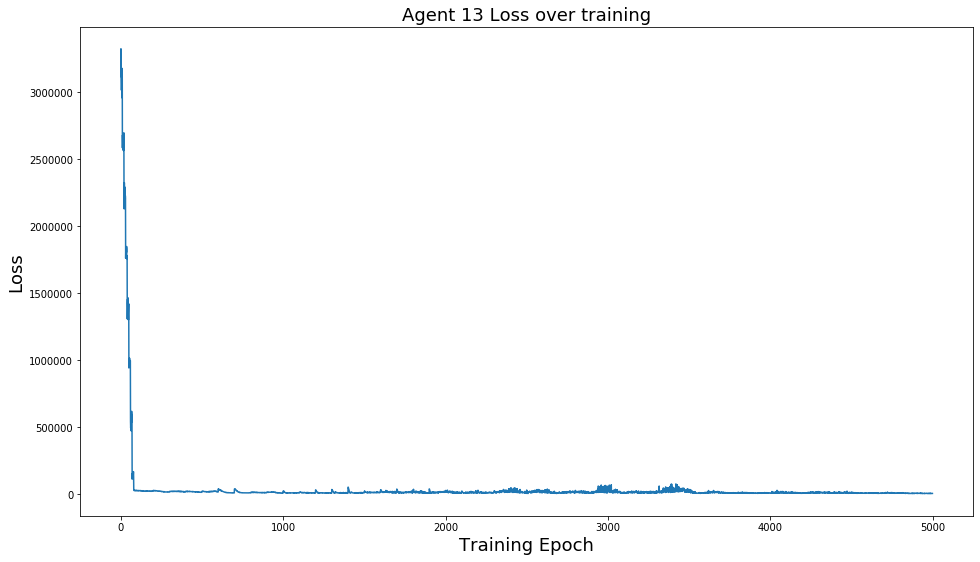

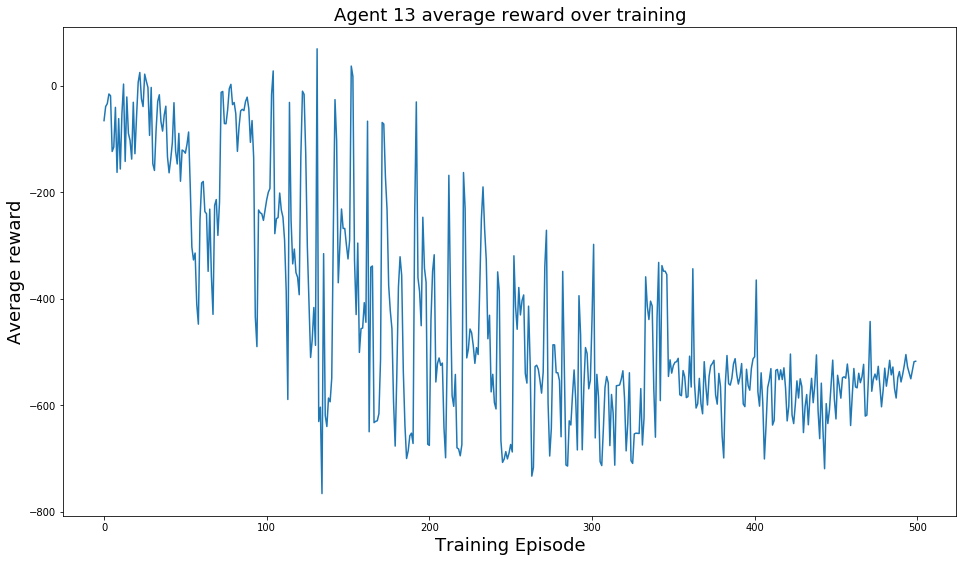

In [8]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    #plt.yscale('log')
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [ ]:
Balance_int_MultiDQN_Agents.load(500, best = True)

In [ ]:
Balance_int_MultiDQN_Agents.demo()

In [ ]:
Balance_int_MultiDQN_Agents.test()

In [ ]:
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Balance_int_MultiDQN_Agents.Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



# Balance RL DQN

In [ ]:
map_name  = 'Balance'
model_name = map_name

vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 3601
timesteps_per_second = 1
agent_type = "DQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [ ]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Balance_MultiDQN_Agents.train(episodes)

In [ ]:
Balance_MultiDQN_Agents.save(500)

In [ ]:
Balance_MultiDQN_Agents.demo()

In [ ]:
# For the agent training
ploty = 1
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print("Agent "+str(idx))
    #print(ploty)
    #plt.subplot(14, 2, ploty)

    plt.figure('6'+str(idx),figsize=(4.5, 3))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", \
                        "Agent{}_Loss.png".format(idx)) 
    #plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "DQN", \
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    ploty+=1
    #print(ploty)

    
    #plt.subplot(14, 2, ploty)
    plt.figure('7'+str(idx),figsize=(4.5, 3))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    #plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    #Loss_rewarddf.to_csv(csv_Path,index=False)
    ploty+=1
    

In [ ]:
Balance_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Balance_MultiDQN_Agents.Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Balance_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Balance_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Balance_MultiDQN_Agents.load(498, best = True)

In [ ]:
Balance_MultiDQN_Agents.demo()

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Straight_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.train(200) 

In [ ]:
Single_Cross_Straight_MultiAC_Agents.save(401)


In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(200, best = True)
            
            
            
        
            

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Single_Cross_Straight_MultiAC_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiAC_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.Agents[0].Loss

In [ ]:
Single_Cross_Straight_MultiAC_Agents.demo()

# Single_Cross_Straight DQN

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.load(300 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Straight_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.demo()

# Single_Cross_Triple 4 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3600

agent_type = "AC"
Session_ID = "Single_Cross_TripleAC4test1"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
    },
   'demand' : {"default" : [400,400,400,400] }
}

In [ ]:
gamma = 0.85
alpha = 0.00005


value = 0.5
entropy = 5000
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple4_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.demo()

# Single_Cross_Triple 4 action DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

Session_ID = "Single_Cross_Triple4_actions"
#Session_ID = "DQN"

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.train(120)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.save()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

In [ ]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed correctly (when the agent doesn't work) 
"""



In [ ]:
plt.figure(4)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].loss)

plt.figure(5)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)
print(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.demo()

# Single_Cross_Triple 8 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple8_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.demo()

# Single_Cross_Triple 8 actions DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes) 

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()